In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Importing machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('data.csv', encoding='unicode_escape')


In [3]:
df.head()
  # Loading the dataset


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.shape

(435742, 13)

In [5]:
df.info()
  # Checking the over all information on the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
df.isnull().sum()
  # There are a lot of missing values present in the dataset

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
 df.nunique()
   # These are all the unique values present in the dataframe


stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [9]:
df.columns
   # These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

# Data visualization

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

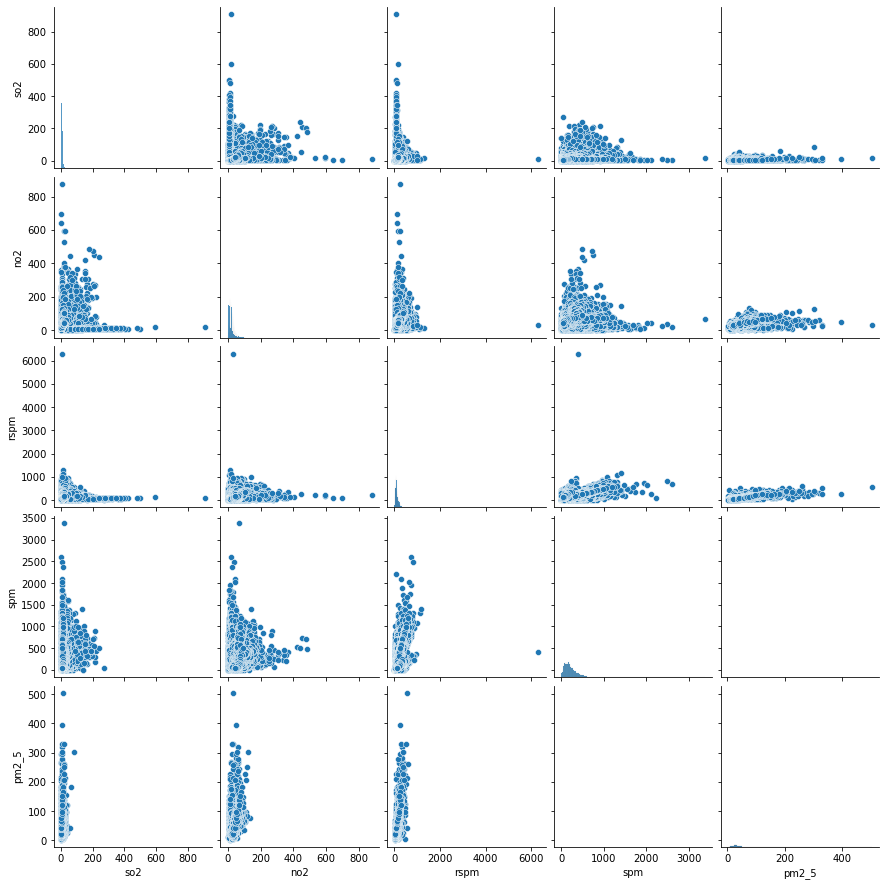

In [10]:
sns.pairplot(data=df)
df['state'].value_counts()
# Viewing the count of values present in the state column

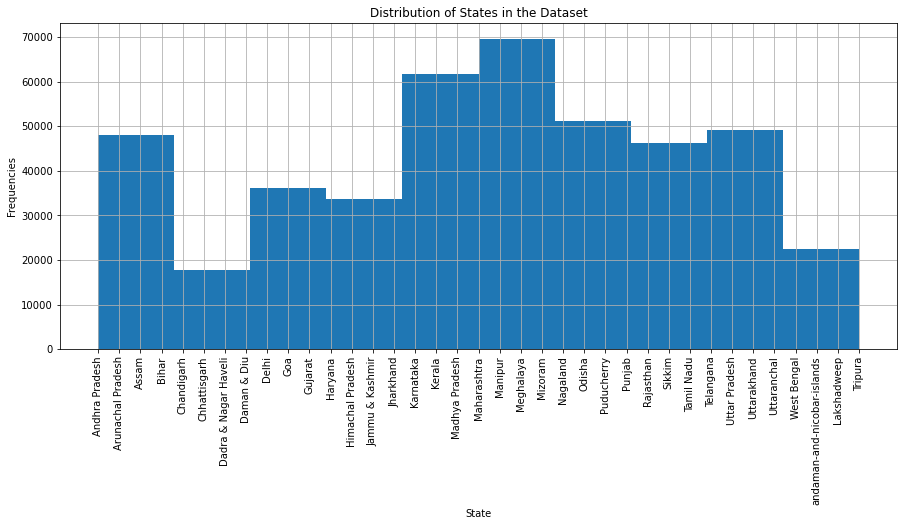

In [11]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)  
df['state'].hist()  
plt.xlabel('State')
plt.ylabel('Frequencies')
plt.title('Distribution of States in the Dataset') 
plt.show()


In [12]:
df['type'].value_counts()
   # Viewing the count of values present in the type column

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

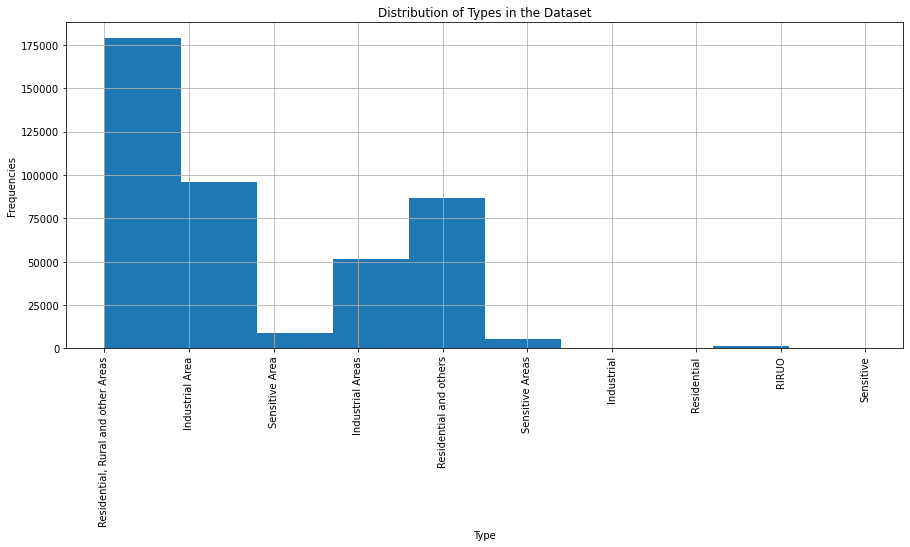

In [13]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df['type'].hist() 
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.title('Distribution of Types in the Dataset')  
plt.show()



In [14]:
df['agency'].value_counts()
    # Viewing the counts of values present in the agency column

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

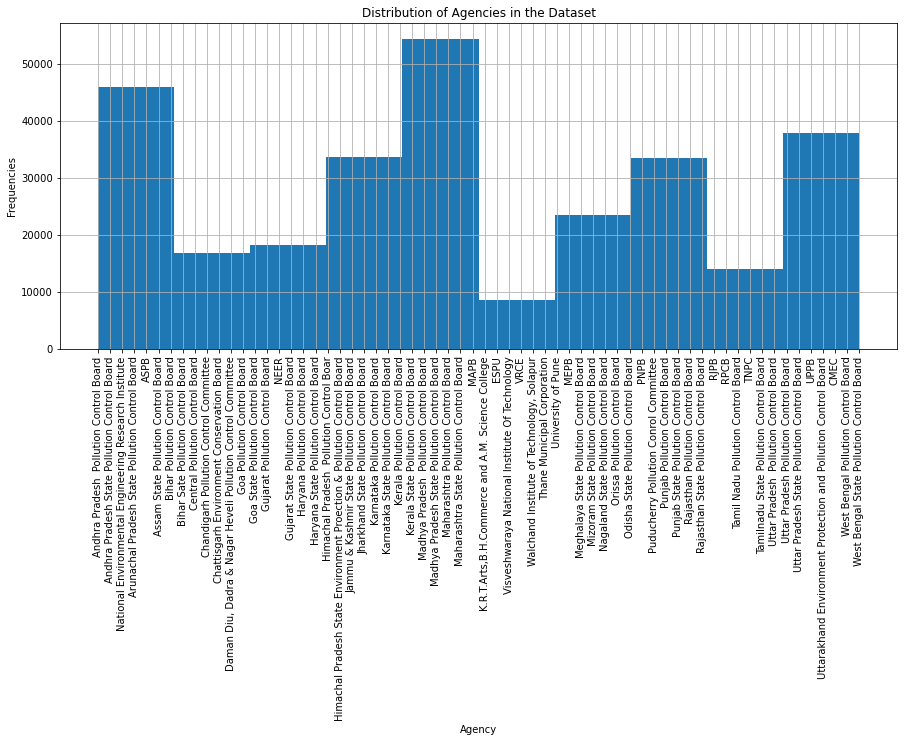

In [15]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df['agency'].hist()  # Use square brackets to access the 'agency' column
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.title('Distribution of Agencies in the Dataset')  # Added a title for clarity
plt.show()

    

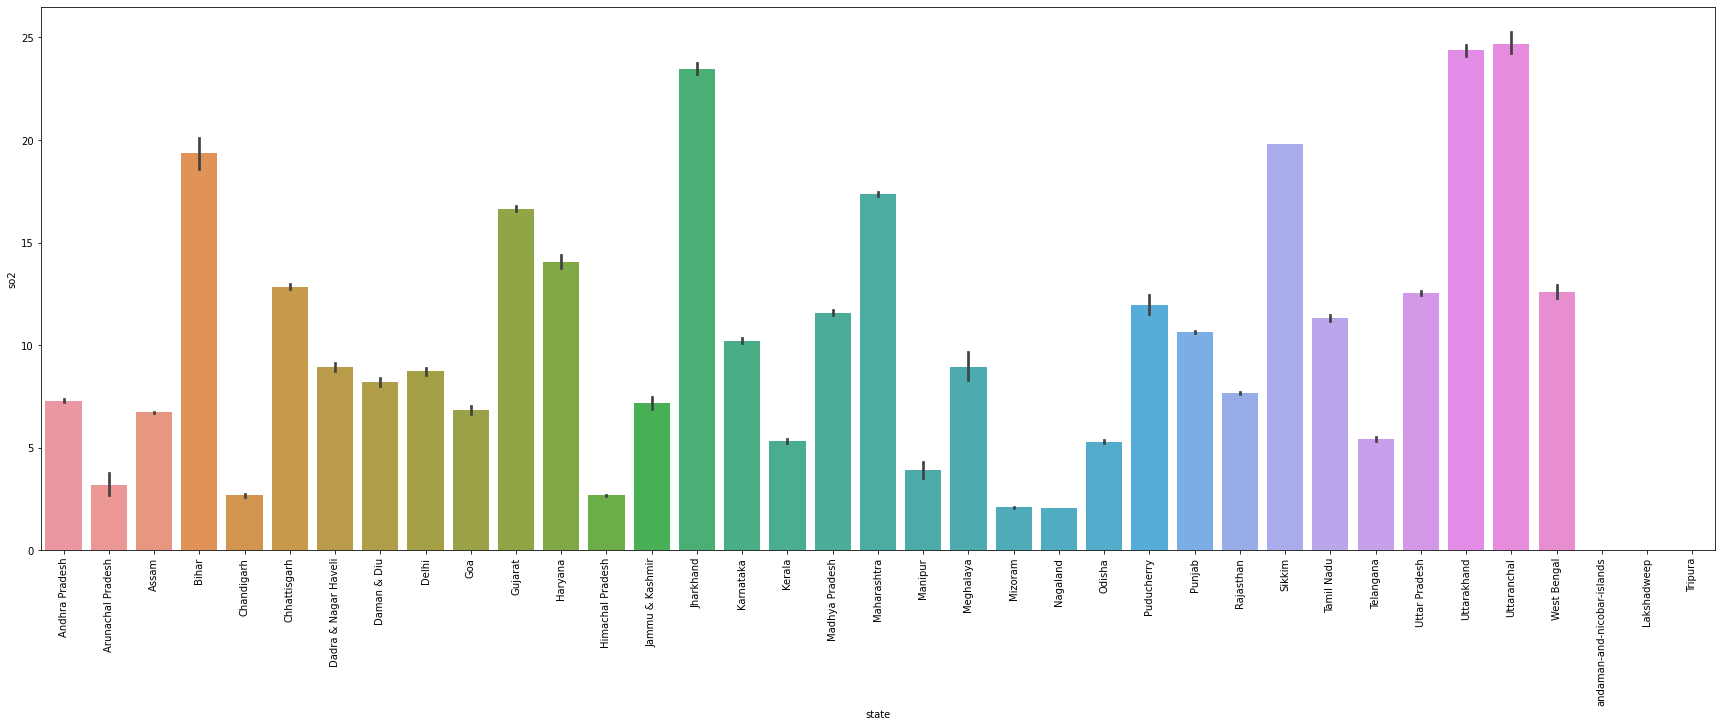

In [16]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air 

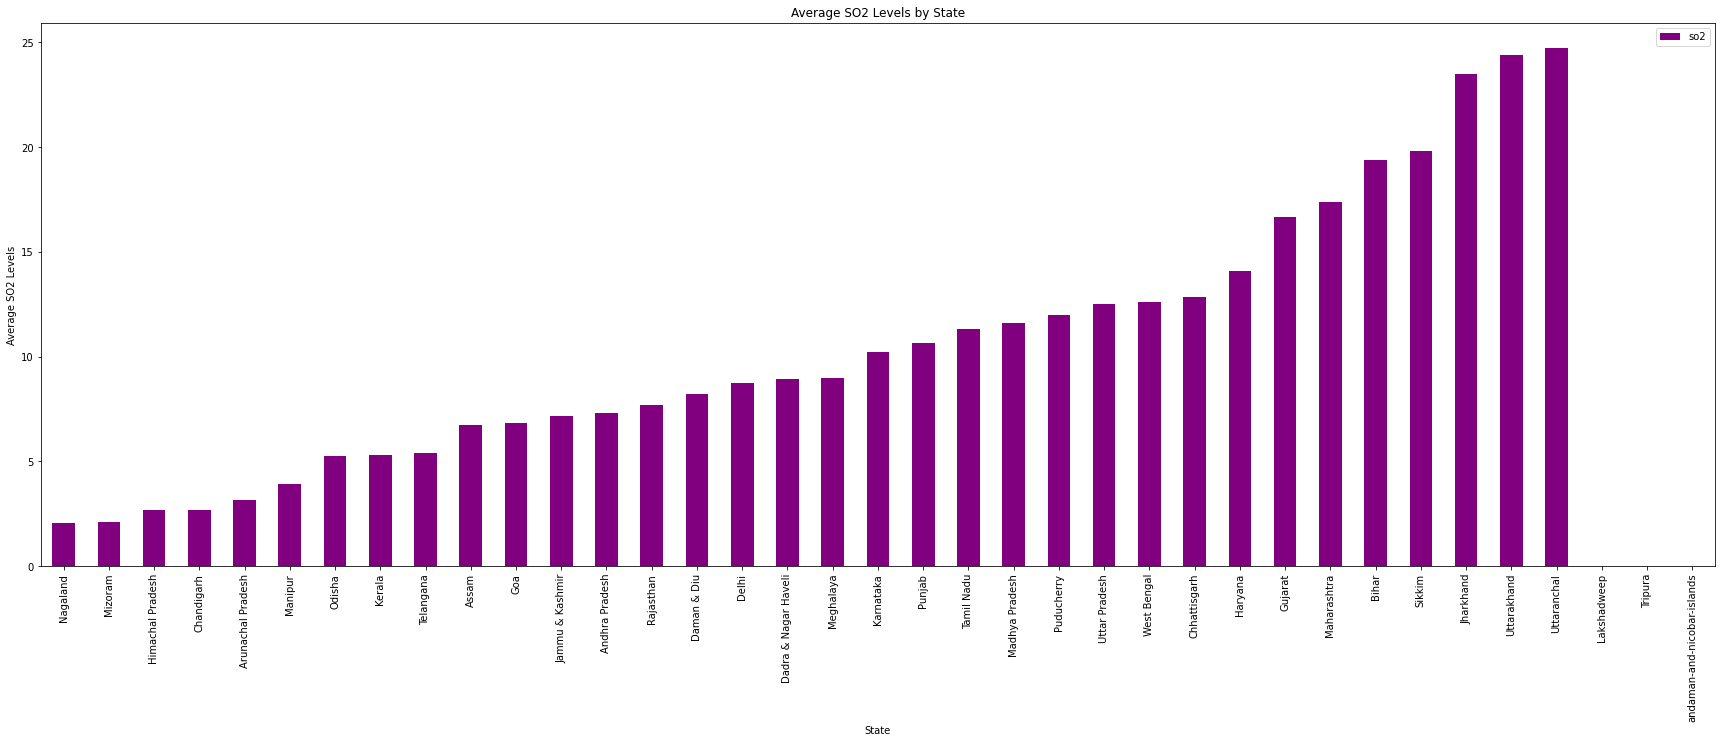

In [17]:
plt.rcParams['figure.figsize'] = (30, 10)
df[['so2', 'state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.xlabel('State')
plt.ylabel('Average SO2 Levels')
plt.title('Average SO2 Levels by State')
plt.show()


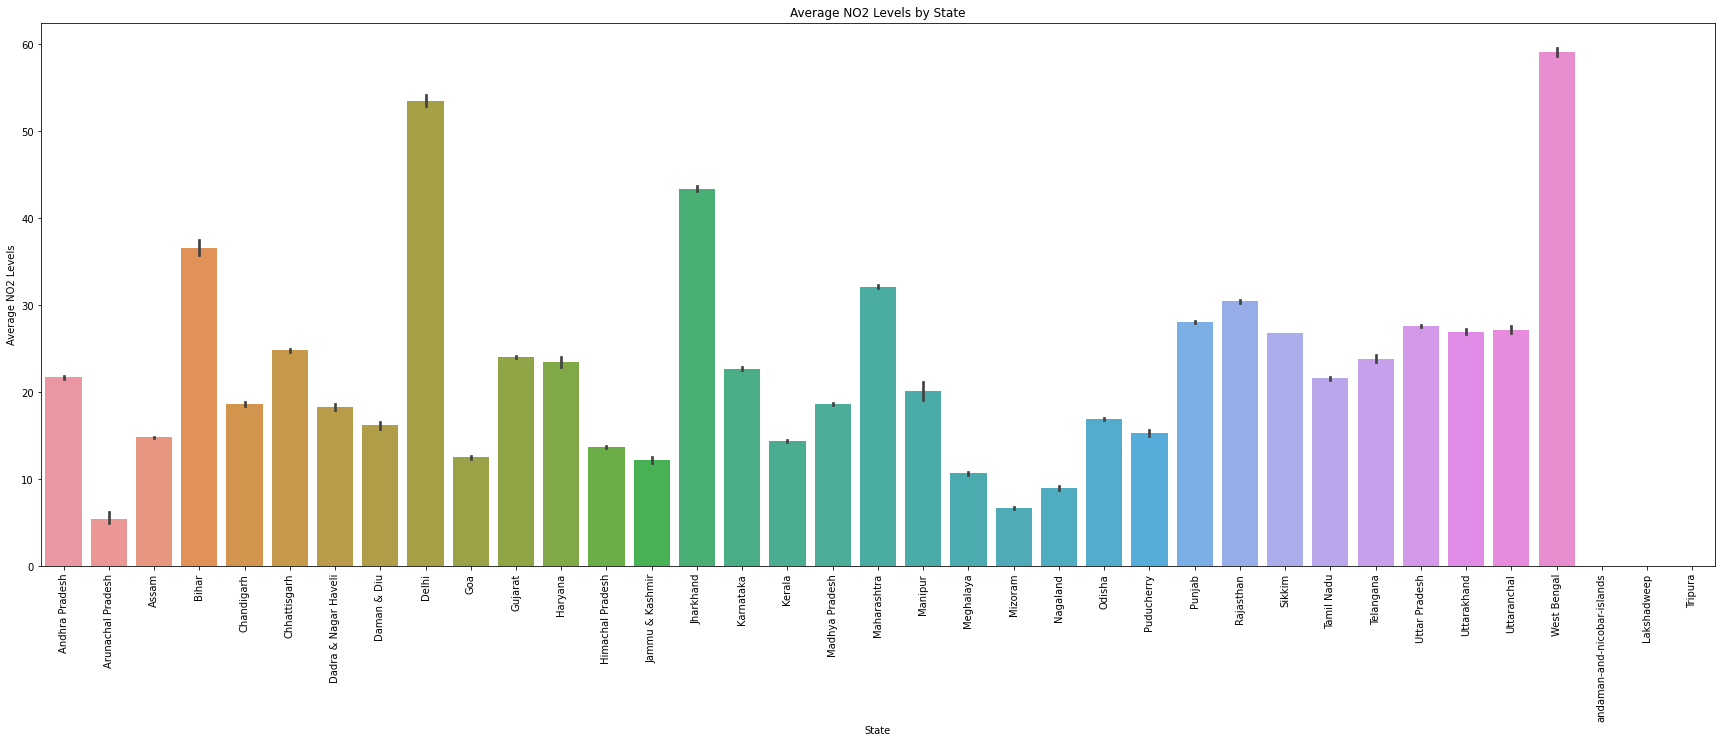

In [18]:
plt.figure(figsize=(30, 10))
sns.barplot(x='state', y='no2', data=df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average NO2 Levels')
plt.title('Average NO2 Levels by State')
plt.show()



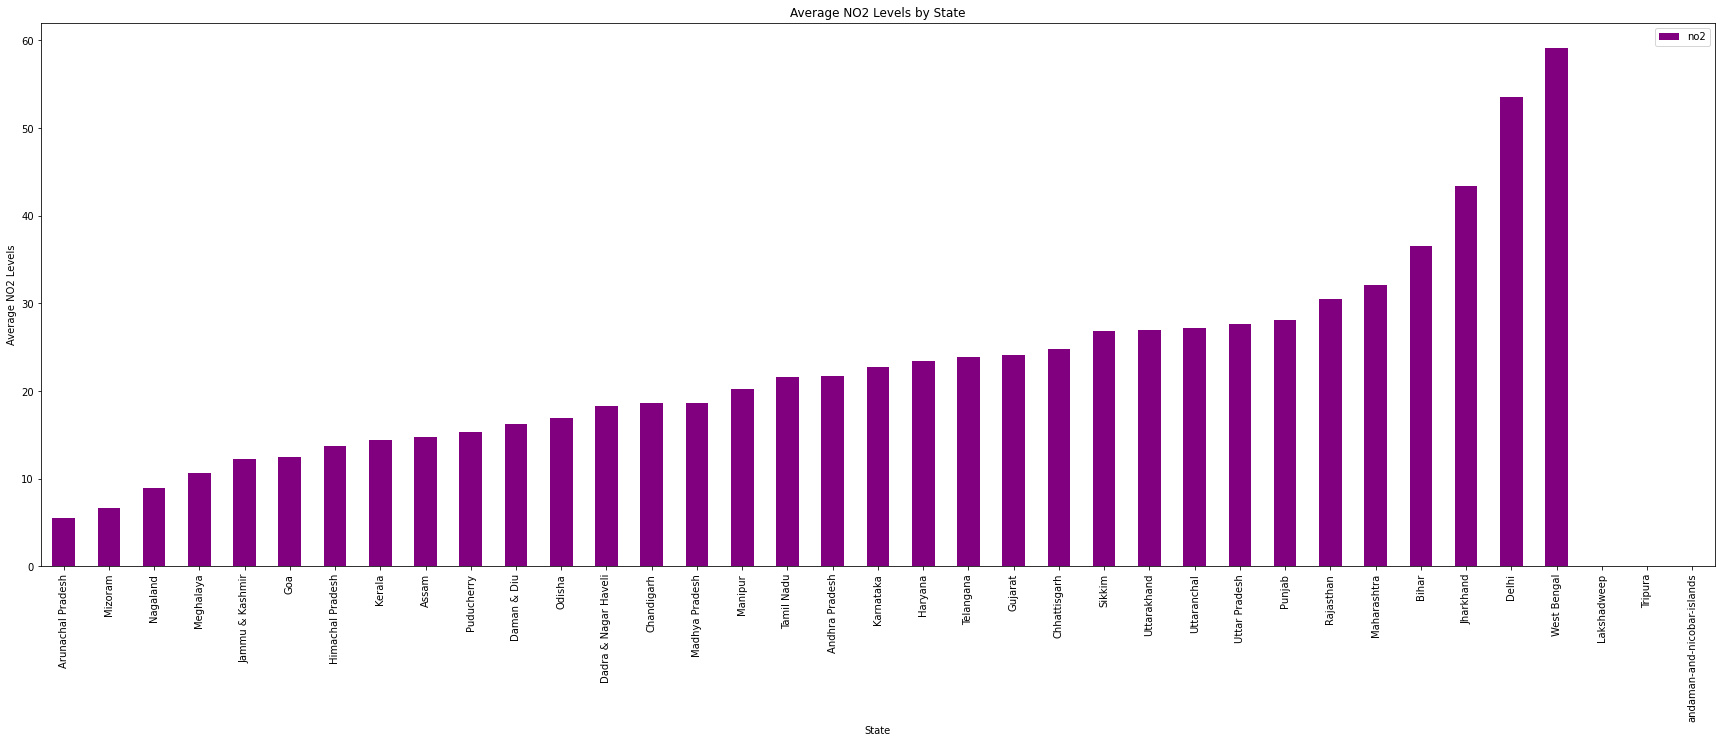

In [19]:
df[['no2', 'state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.xlabel('State')
plt.ylabel('Average NO2 Levels')
plt.title('Average NO2 Levels by State')
plt.show()


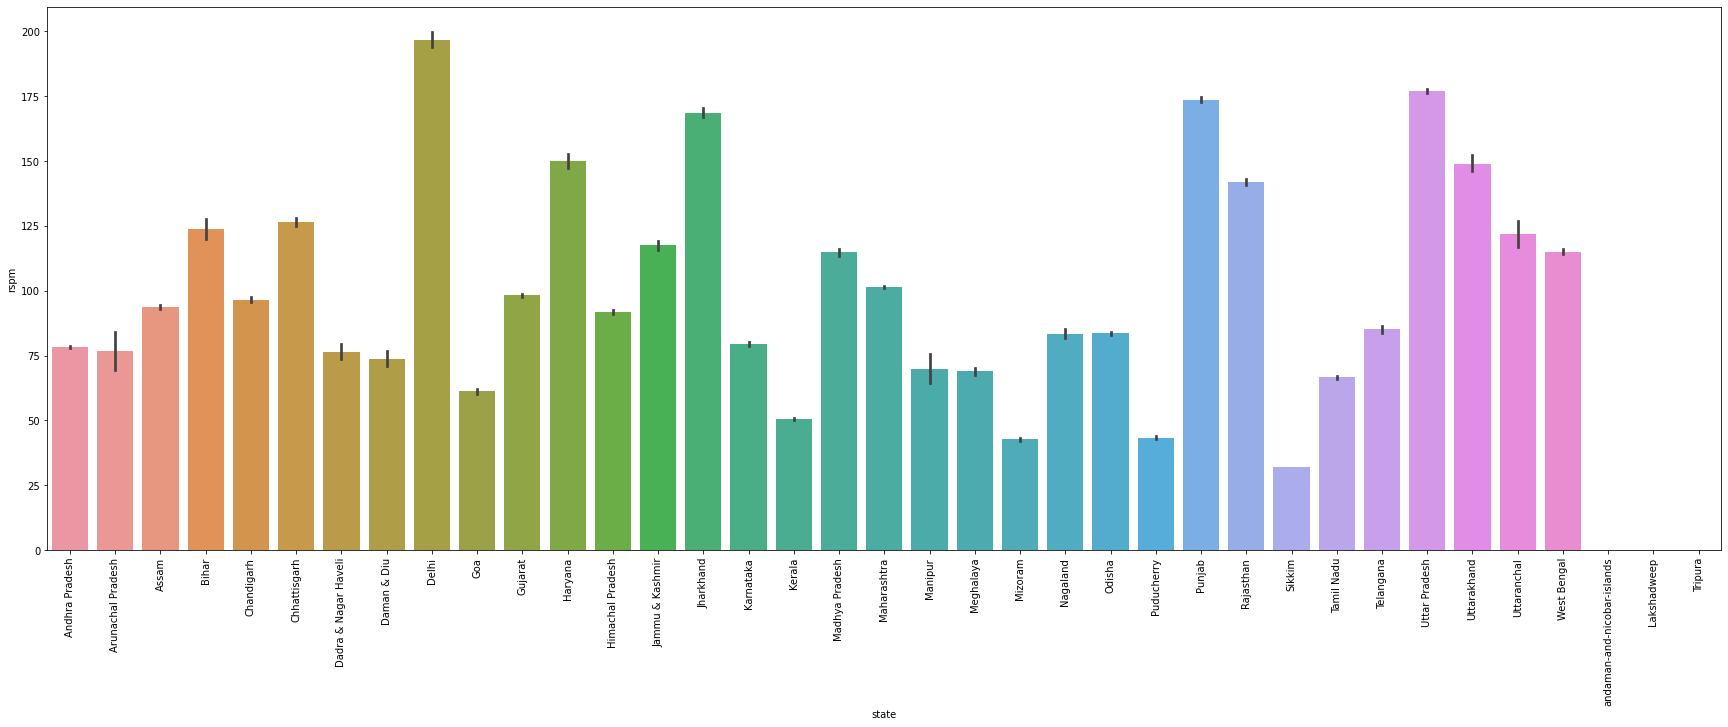

In [20]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states


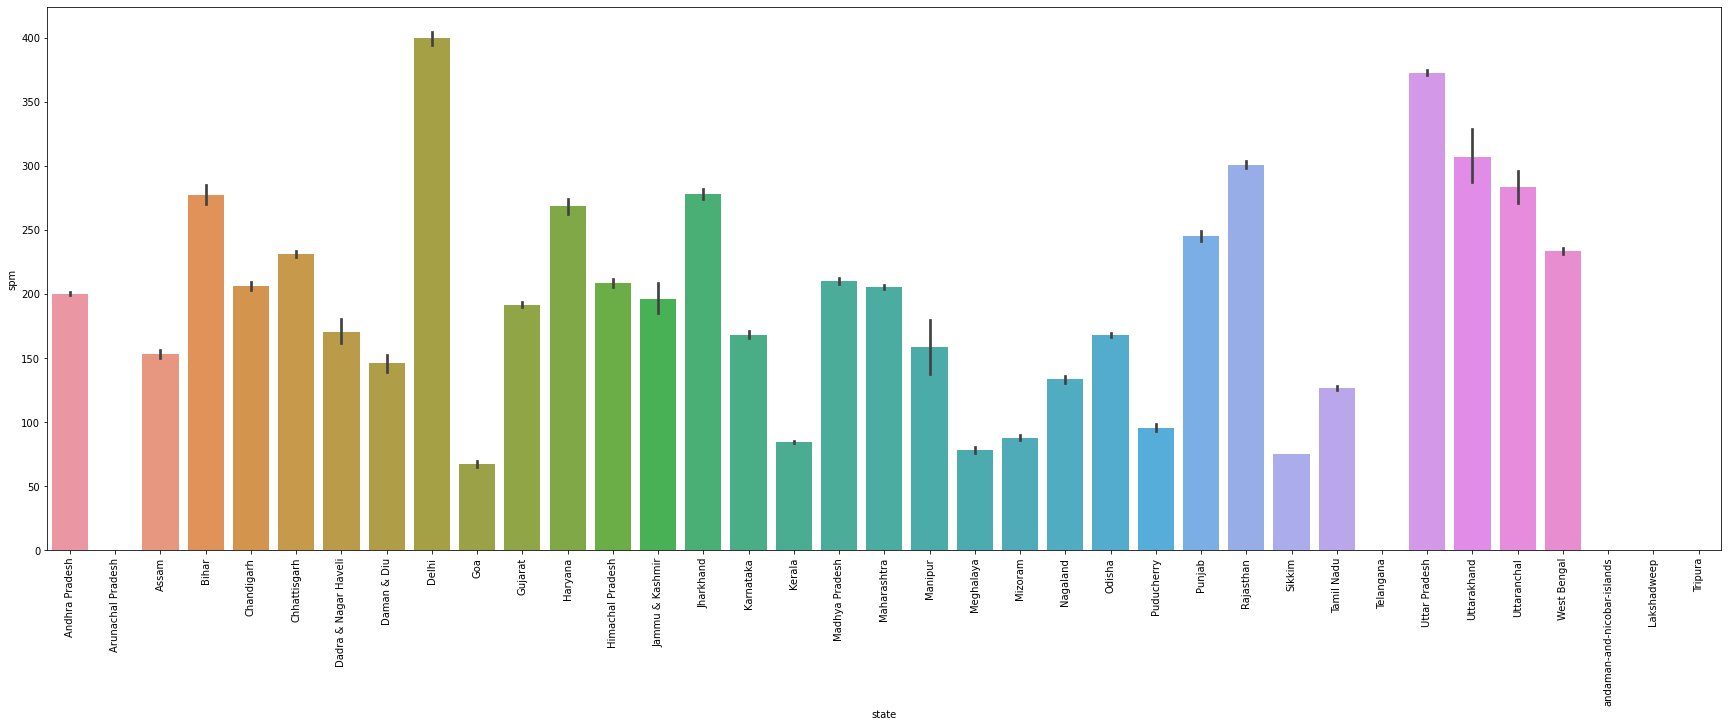

In [21]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states

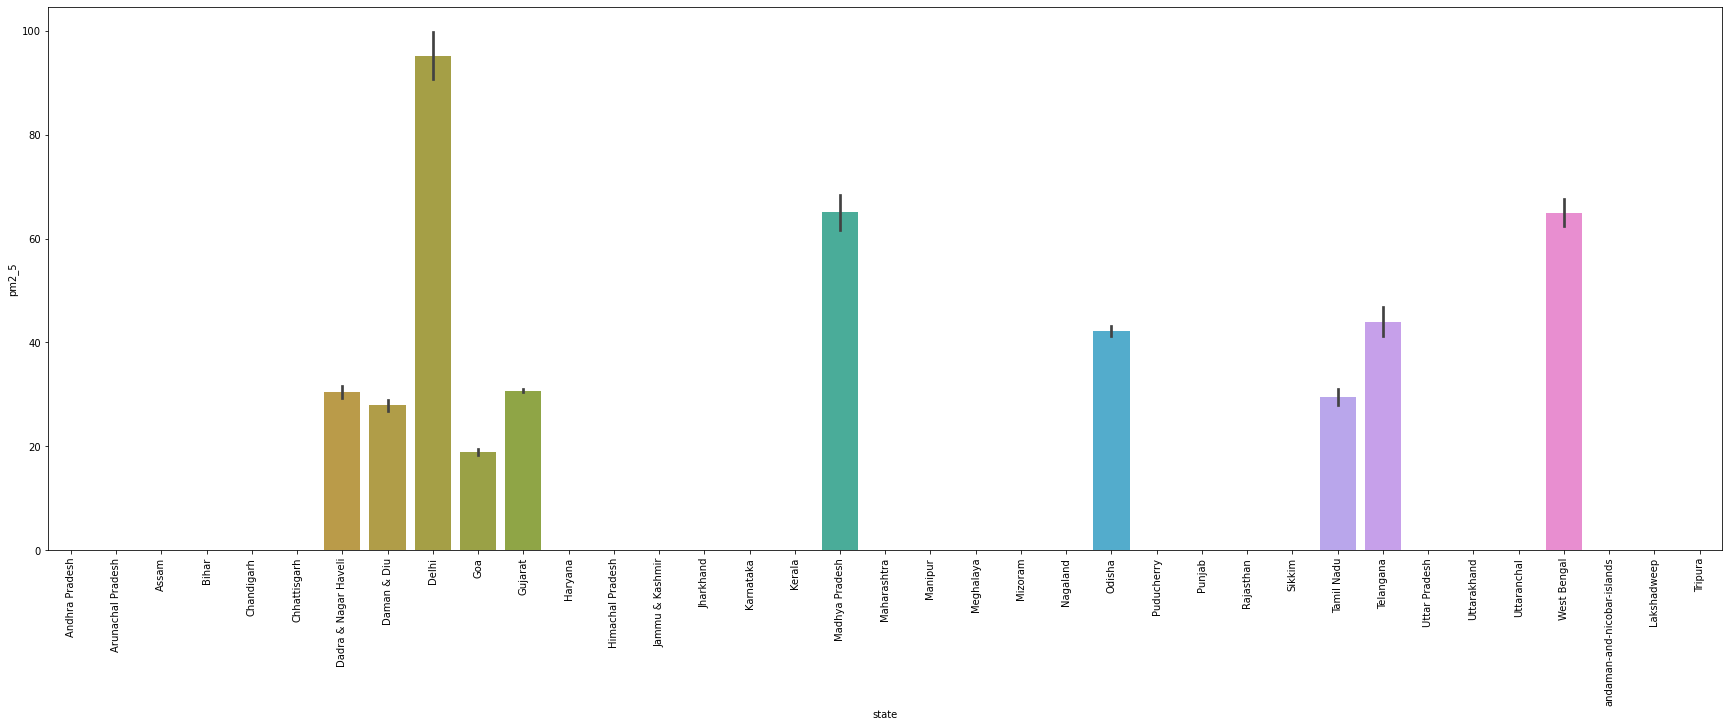

In [22]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states

In [23]:
# Checking null values
null_values = df.isnull().sum().sort_values(ascending=False)

# Calculating null values percentage
null_values_percentage = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)

# Creating a DataFrame to display results
null_info = pd.DataFrame({
    'Null Values': null_values,
    'Null Values Percentage': null_values_percentage
})

# Displaying the results
print(null_info)


                             Null Values  Null Values Percentage
pm2_5                             426428               97.862497
spm                               237387               54.478797
agency                            149481               34.304933
stn_code                          144077               33.064749
rspm                               40222                9.230692
so2                                34646                7.951035
location_monitoring_station        27491                6.309009
no2                                16233                3.725370
type                                5393                1.237659
date                                   7                0.001606
sampling_date                          3                0.000688
location                               3                0.000688
state                                  0                0.000000


In [24]:
# Concatenating total null values and their percentage of missing values
missing_data_with_percentage = pd.concat([null_values, null_values_percentage], axis=1, keys=['Total', 'Percent'])

# Displaying the results
print(missing_data_with_percentage)


                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
state                             0   0.000000


In [25]:
# Dropping unnecessary columns
df.drop(["agency", 'stn_code', 'date', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True)



In [26]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [27]:
# Displaying the DataFrame after dropping columns
print(df)

                              state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands        NaN   
435740                  Lakshadweep        NaN   
435741                      Tripura        NaN   

                                      type   so2   no2   rspm  spm  pm2_5  
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN    NaN  
1                          Industrial Area   3.1   7.0    NaN  NaN    NaN  
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN    NaN  
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN    NaN  
4                  

In [28]:
# Null value imputation for 'location' column
df['location'].fillna(df['location'].mode()[0], inplace=True)

# Null value imputation for 'type' column
df['type'].fillna(df['type'].mode()[0], inplace=True)


In [29]:
 # null values are replaced with zeros for the numerical data
df.fillna(0, inplace=True)

In [30]:
# Now we have successfully imputed null values which were present in the dataset
df.isnull().sum()


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [31]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


In [32]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    if (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    if (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si
df['si']=df['so2'].apply(calculate_si)
data=df[['so2','si']]
data.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [33]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
df['ni']=df['no2'].apply(calculate_ni)
data= df[['no2','ni']]
data.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [34]:
# Function to calculate RSPM individual pollutant index (rpi)
def calculate_rpi(rspm):
    rpi_value = 0

    if rspm <= 30:
        rpi_value = rspm * 50 / 30
    elif 30 < rspm <= 60:
        rpi_value = 50 + (rspm - 30) * 50 / 30
    elif 60 < rspm <= 90:
        rpi_value = 100 + (rspm - 60) * 100 / 30
    elif 90 < rspm <= 120:
        rpi_value = 200 + (rspm - 90) * 100 / 30
    elif 120 < rspm <= 250:
        rpi_value = 300 + (rspm - 120) * (100 / 130)
    else:
        rpi_value = 400 + (rspm - 250) * (100 / 130)

    return rpi_value

# Applying the function to the 'rspm' column and creating a new 'rpi' column in the DataFrame
df['rpi'] = df['rspm'].apply(calculate_rpi)

# Extracting relevant columns for further analysis
data = df[['rspm', 'rpi']]
data.tail()


,rspm,rpi
435737,143.0,317.692308
435738,171.0,339.230769
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [35]:
#Function to calculate no2 individual pollutant index(spi)

def calculate_spi(spm):
    spi = 0
    if spm <= 50:
        spi = spm
    elif 50 < spm <= 100:
        spi = spm
    elif 100 < spm <= 250:
        spi = 100 + (spm - 100) * (100 / 150)
    elif 250 < spm <= 350:
        spi = 200 + (spm - 250)
    elif 350 < spm <= 450:
        spi = 300 + (spm - 350) * (100 / 80)
    else:
        spi = 400 + (spm - 430) * (100 / 80)
    return spi
df['spi']=df['spm'].apply(calculate_spi)
data= df[['spm','spi']]
data.tail()

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


In [36]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'state', 'si', 'ni', 'rpi', 'spi'

# Function to calculate AQI for each data value
def calculate_aqi(si, ni, spi, rpi):
    aqi = 0
    if si > ni and si > spi and si > rpi:
        aqi = si
    elif spi > si and spi > ni and spi > rpi:
        aqi = spi
    elif ni > si and ni > spi and ni > rpi:
        aqi = ni
    elif rpi > si and rpi > ni and rpi > spi:
        aqi = rpi
    return aqi

# Applying the function to the DataFrame
df['AQI'] = df.apply(lambda x: calculate_aqi(x['si'], x['ni'], x['spi'], x['rpi']), axis=1)

# Selecting relevant columns for display
data = df[['state', 'si', 'ni', 'rpi', 'spi', 'AQI']]

# Displaying the result
print(data.head())


            state     si      ni  rpi  spi     AQI
0  Andhra Pradesh  6.000  21.750  0.0  0.0  21.750
1  Andhra Pradesh  3.875   8.750  0.0  0.0   8.750
2  Andhra Pradesh  7.750  35.625  0.0  0.0  35.625
3  Andhra Pradesh  7.875  18.375  0.0  0.0  18.375
4  Andhra Pradesh  5.875   9.375  0.0  0.0   9.375


In [37]:
def AQI_Range(x):
    if x <= 50:
        return "Good"
    elif 50 < x <= 100:
        return "Moderate"
    elif 100 < x <= 200:
        return "Poor"
    elif 200 < x <= 300:
        return "Unhealthy"
    elif 300 < x <= 400:
        return "Very Unhealthy"
    elif x > 400:
        return "Hazardous"

# Applying the function to create a new column 'AQI Range'
df['AQI Range'] = df['AQI'].apply(AQI_Range)
df.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,AQI,AQI Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [38]:
df['AQI Range'].value_counts()


Poor              117564
Very Unhealthy    108487
Moderate           78452
Unhealthy          71434
Hazardous          32207
Good               27598
Name: AQI Range, dtype: int64

In [39]:
# Splitting the dataset into Dependent and Independent columns
X = df[['so2', 'no2', 'rspm', 'spm']]
Y = df['AQI']

# Displaying the independent variables (features)
X.head()


,so2,no2,rspm,spm
0,4.8,17.4,0.0,0.0
1,3.1,7.0,0.0,0.0
2,6.2,28.5,0.0,0.0
3,6.3,14.7,0.0,0.0
4,4.7,7.5,0.0,0.0


In [40]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [41]:

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Displaying the shapes of the training and testing sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)






(348593, 4) (87149, 4) (348593,) (87149,)


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X and Y are your feature and target variables
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Creating a KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Fitting the model on the training data
knn_regressor.fit(X_train, Y_train)

# Predicting on the training set
train_pred_knn = knn_regressor.predict(X_train)

# Predicting on the test set
test_pred_knn = knn_regressor.predict(X_test)

# Calculating RMSE for training and testing sets
RMSE_train_knn = np.sqrt(metrics.mean_squared_error(Y_train, train_pred_knn))
RMSE_test_knn = np.sqrt(metrics.mean_squared_error(Y_test, test_pred_knn))

# Displaying RMSE values for KNN
print("RMSE Training Data (KNN):", str(RMSE_train_knn))
print("RMSE Test Data (KNN):", str(RMSE_test_knn))
print('-' * 50)
# Displaying R-squared values for KNN
print('R-squared value on train (KNN):', knn_regressor.score(X_train, Y_train))
print('R-squared value on test (KNN):', knn_regressor.score(X_test, Y_test))


RMSE Training Data (KNN): 6.023572058525223
RMSE Test Data (KNN): 5.813892300708566
--------------------------------------------------
R-squared value on train (KNN): 0.9981293029454492
R-squared value on test (KNN): 0.9982458389379647


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your features X2 and target variable Y2

X2 = df[["so2", "no2", "rpi", "spm"]]
Y2 = df['AQI Range']

# Splitting the data into Independent and dependent columns for classification
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

# Checking the shapes of the training and testing sets
print(X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)


(291947, 4) (143795, 4) (291947,) (143795,)


In [44]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Assuming x_train2, Y_train2, X_test2, Y_test2 are defined somewhere in your code

# Instantiate the KNN classifier
KNN = KNeighborsClassifier()

# Fit the model on the training data
KNN.fit(X_train2, Y_train2)

# Predict on the training set
train_preds5 = KNN.predict(X_train2)

# Accuracy on the training set
print("Model accuracy on train is:", accuracy_score(Y_train2, train_preds5))

# Predict on the test set
test_preds5 = KNN.predict(X_test2)

# Accuracy on the test set
print("Model accuracy on test is:", accuracy_score(Y_test2, test_preds5))
print('-' * 50)

# Kappa Score
print("Kappa Score is:", metrics.cohen_kappa_score(Y_test2, test_preds5))


Model accuracy on train is: 0.9952765399199169
Model accuracy on test is: 0.9920650926666434
--------------------------------------------------
Kappa Score is: 0.9900343340130441


In [45]:
KNN.predict([[1,1.2,3.12,0]])

array(['Good'], dtype=object)

In [46]:
KNN.predict([[325.7,3,798.182,203]])
    

array(['Hazardous'], dtype=object)

In [47]:
KNN.predict([[35.89,345,7,203]])

array(['Unhealthy'], dtype=object)

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X and Y are your feature and target variables
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Creating a Decision Tree regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters as needed

# Fitting the model on the training data
dt_regressor.fit(X_train, Y_train)

# Predicting on the training set
train_pred_dt = dt_regressor.predict(X_train)

# Predicting on the test set
test_pred_dt = dt_regressor.predict(X_test)

# Calculating RMSE for training and testing sets
RMSE_train_dt = np.sqrt(metrics.mean_squared_error(Y_train, train_pred_dt))
RMSE_test_dt = np.sqrt(metrics.mean_squared_error(Y_test, test_pred_dt))

# Displaying RMSE values for Decision Tree
print("RMSE Training Data (Decision Tree):", str(RMSE_train_dt))
print("RMSE Test Data (Decision Tree):", str(RMSE_test_dt))
print('-' * 50)
# Displaying R-squared values for Decision Tree
print('R-squared value on train (Decision Tree):', dt_regressor.score(X_train, Y_train))
print('R-squared value on test (Decision Tree):', dt_regressor.score(X_test, Y_test))


RMSE Training Data (Decision Tree): 5.3593945986874165e-11
RMSE Test Data (Decision Tree): 5.382787883131199
--------------------------------------------------
R-squared value on train (Decision Tree): 1.0
R-squared value on test (Decision Tree): 0.9984963386599671


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X and Y are your feature and target variables
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Creating a Random Forest regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Fitting the model on the training data
rf_regressor.fit(X_train, Y_train)

# Predicting on the training set
train_pred_rf = rf_regressor.predict(X_train)

# Predicting on the test set
test_pred_rf = rf_regressor.predict(X_test)

# Calculating RMSE for training and testing sets
RMSE_train_rf = np.sqrt(metrics.mean_squared_error(Y_train, train_pred_rf))
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(Y_test, test_pred_rf))

# Displaying RMSE values for Random Forest
print("RMSE Training Data (Random Forest):", str(RMSE_train_rf))
print("RMSE Test Data (Random Forest):", str(RMSE_test_rf))
print('-' * 50)
# Displaying R-squared values for Random Forest
print('R-squared value on train (Random Forest):', rf_regressor.score(X_train, Y_train))
print('R-squared value on test (Random Forest):', rf_regressor.score(X_test, Y_test))


RMSE Training Data (Random Forest): 3.09693567278499
RMSE Test Data (Random Forest): 3.972787787302723
--------------------------------------------------
R-squared value on train (Random Forest): 0.9995055076109945
R-squared value on test (Random Forest): 0.9991809201615182


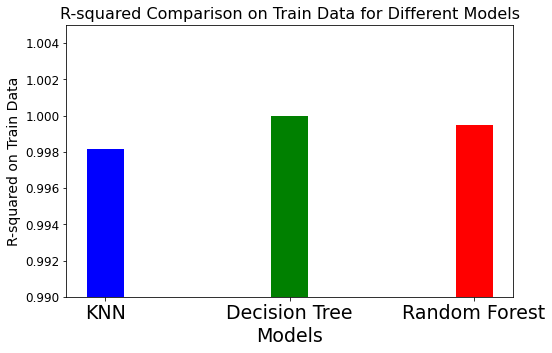

In [50]:
import matplotlib.pyplot as plt

# R-squared values on train data
rsquared_train_values = [0.9981293029454492, 1.0, 0.9995055076109945]
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.3  # Decreased bar width

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest']

# Creating thin bar graph with increased font size for model names and axis labels
plt.bar(models, rsquared_train_values, color=['blue', 'green', 'red'], width=0.2)
plt.xlabel('Models', fontsize=19)
plt.ylabel('R-squared on Train Data', fontsize=14)
plt.title('R-squared Comparison on Train Data for Different Models', fontsize=16)
plt.ylim(0.99, 1.005)  # Set the y-axis limit for better visualization

# Increase font size for axis tick labels
plt.xticks(fontsize=19)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
import tkinter as tk

def calculate_AQI():
    pollutants = [float(p1.get()), float(p2.get()), float(p3.get()), float(p4.get())]
    AQI = sum(pollutants)

    def AQI_Range(x):
        if x <= 50:
            return "Good"
        elif 50 < x <= 100:
            return "Moderate"
        elif 100 < x <= 200:
            return "Poor"
        elif 200 < x <= 300:
            return "Unhealthy"
        elif 300 < x <= 400:
            return "Very Unhealthy"
        elif x > 400:
            return "Hazardous"

    AQI_range = AQI_Range(AQI)
    output_label.config(text=f"The air quality is {AQI_range}.")

root = tk.Tk()
root.title("Air Quality Index Calculator")
root.configure(bg='#f0f0f0')
root.geometry("1000x600")  # Adjust the size as desired

font_size = 50
font = ('Helvetica', font_size)
smaller_font = ('Helvetica', 20)  # Decreased font size for the input fields
button_font = ('Helvetica', 20)  # Define the font size for the button
output_font = ('Helvetica', 20)  # Define the font size for the output label

for i in range(6):
    root.grid_rowconfigure(i, weight=1)
    root.grid_columnconfigure(i, weight=1)

heading_label = tk.Label(root, text="Predicting the Quality of Air", font=font)
heading_label.grid(row=0, column=0, columnspan=2, sticky="nsew")

tk.Label(root, text="Sulfur Dioxide (SO2) (µg/m³):", font=smaller_font).grid(row=1, column=0)
tk.Label(root, text="Nitrogen Dioxide (NO2) (µg/m³):", font=smaller_font).grid(row=2, column=0)
tk.Label(root, text="Respirable Particulate Matter Index (RPI) (µg/m³):", font=smaller_font).grid(row=3, column=0)
tk.Label(root, text="Suspended Particulate Matter (SPM) (µg/m³):", font=smaller_font).grid(row=4, column=0)

p1 = tk.Entry(root, font=smaller_font)
p1.grid(row=1, column=1)
p2 = tk.Entry(root, font=smaller_font)
p2.grid(row=2, column=1)
p3 = tk.Entry(root, font=smaller_font)
p3.grid(row=3, column=1)
p4 = tk.Entry(root, font=smaller_font)
p4.grid(row=4, column=1)

calculate_button = tk.Button(root, text="Calculate AQI", command=calculate_AQI, font=button_font)
calculate_button.grid(row=5, column=0, columnspan=2)

output_label = tk.Label(root, text="", font=output_font)
output_label.grid(row=6, column=0, columnspan=2)

root.mainloop()
